Porcentajes de los dígitos - Guillermo Lasso:
Dígito 1: Observado: 33.33%, Benford: 30.10%
Dígito 2: Observado: 12.50%, Benford: 17.61%
Dígito 3: Observado: 12.50%, Benford: 12.49%
Dígito 4: Observado: 4.17%, Benford: 9.69%
Dígito 5: Observado: 12.50%, Benford: 7.92%
Dígito 6: Observado: 4.17%, Benford: 6.69%
Dígito 7: Observado: 4.17%, Benford: 5.80%
Dígito 8: Observado: 12.50%, Benford: 5.12%
Dígito 9: Observado: 4.17%, Benford: 4.58%

Porcentajes de los dígitos - Lenín Moreno:
Dígito 1: Observado: 37.50%, Benford: 30.10%
Dígito 2: Observado: 20.83%, Benford: 17.61%
Dígito 3: Observado: 8.33%, Benford: 12.49%
Dígito 4: Observado: 8.33%, Benford: 9.69%
Dígito 5: Observado: 8.33%, Benford: 7.92%
Dígito 6: Observado: 12.50%, Benford: 6.69%
Dígito 7: Observado: 0.00%, Benford: 5.80%
Dígito 8: Observado: 4.17%, Benford: 5.12%
Dígito 9: Observado: 0.00%, Benford: 4.58%


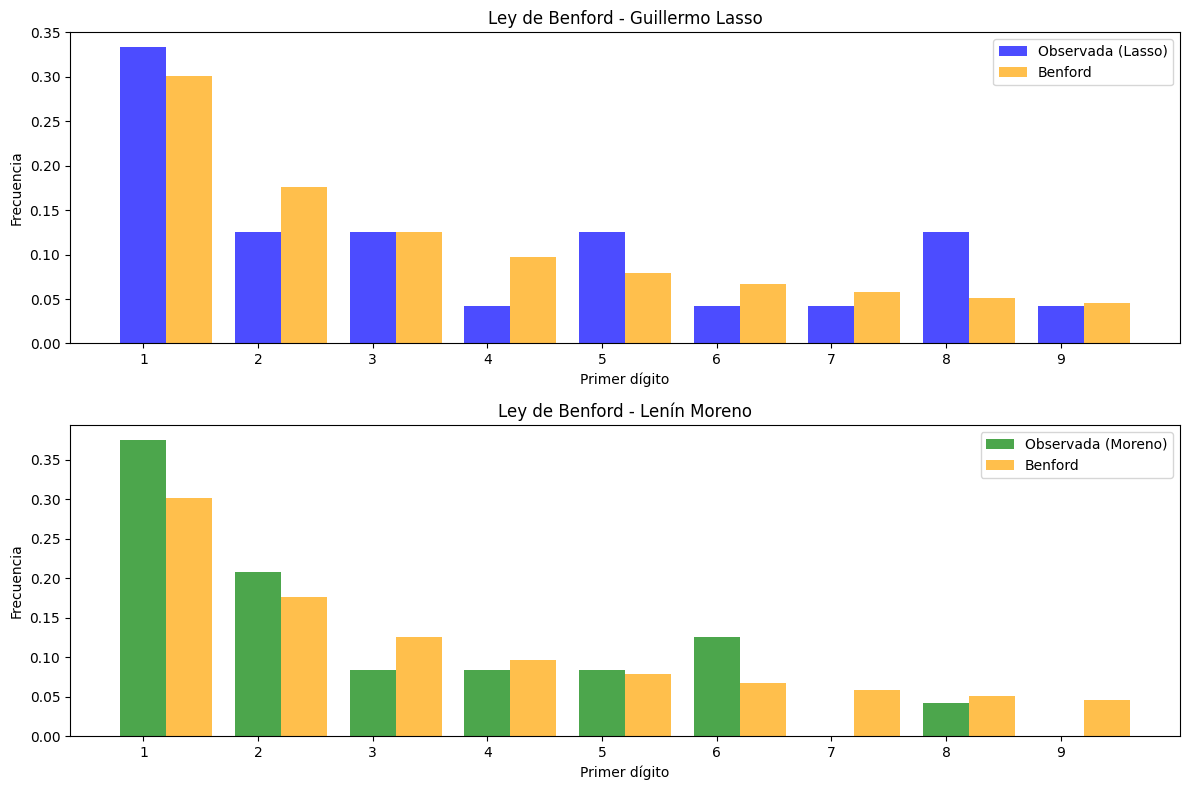

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Cargar el archivo Excel
file_path = 'Resultados Elecciones 2017 EC.xlsx'
data = pd.read_excel(file_path)

# Renombrar columnas para facilitar el manejo
data.columns = [
    'Index', 'Provincia', 'Total_Votantes', 'Lasso_%', 'Moreno_%',
    'Blancos', 'Nulos', 'Votos_Validos', 'Lasso_Cantidad', 'Moreno_Cantidad'
]

# Filtrar las columnas relevantes (eliminar encabezados adicionales o filas no necesarias)
data = data.iloc[1:]  # Eliminar la primera fila que parece ser un encabezado extendido

# Convertir las columnas de votos a valores numéricos
data['Lasso_Cantidad'] = pd.to_numeric(data['Lasso_Cantidad'], errors='coerce')
data['Moreno_Cantidad'] = pd.to_numeric(data['Moreno_Cantidad'], errors='coerce')

# Extraer los datos de las dos últimas columnas
votos_lasso = data['Lasso_Cantidad'].dropna().astype(int).tolist()
votos_moreno = data['Moreno_Cantidad'].dropna().astype(int).tolist()

# Función para extraer el primer dígito
def extraer_primer_digito(numeros):
    return [int(str(x)[0]) for x in numeros if x > 0]

# Ley de Benford teórica
def ley_de_benford():
    return [np.log10(1 + 1/d) for d in range(1, 10)]

# Obtener los primeros dígitos de los votos
primeros_digitos_lasso = extraer_primer_digito(votos_lasso)
primeros_digitos_moreno = extraer_primer_digito(votos_moreno)

# Contar la frecuencia de cada dígito
frecuencia_observada_lasso = Counter(primeros_digitos_lasso)
frecuencia_observada_moreno = Counter(primeros_digitos_moreno)
frecuencia_total_lasso = sum(frecuencia_observada_lasso.values())
frecuencia_total_moreno = sum(frecuencia_observada_moreno.values())

# Normalizar las frecuencias
frecuencia_observada_lasso = [
    frecuencia_observada_lasso[d] / frecuencia_total_lasso for d in range(1, 10)
]
frecuencia_observada_moreno = [
    frecuencia_observada_moreno[d] / frecuencia_total_moreno for d in range(1, 10)
]

# Obtener la distribución teórica de Benford
frecuencia_benford = ley_de_benford()

# Imprimir los porcentajes de cada dígito comparados con Benford
print("Porcentajes de los dígitos - Guillermo Lasso:")
for i, (freq_obs, freq_ben) in enumerate(zip(frecuencia_observada_lasso, frecuencia_benford), start=1):
    print(f"Dígito {i}: Observado: {freq_obs * 100:.2f}%, Benford: {freq_ben * 100:.2f}%")

print("\nPorcentajes de los dígitos - Lenín Moreno:")
for i, (freq_obs, freq_ben) in enumerate(zip(frecuencia_observada_moreno, frecuencia_benford), start=1):
    print(f"Dígito {i}: Observado: {freq_obs * 100:.2f}%, Benford: {freq_ben * 100:.2f}%")

# Graficar los resultados para ambos candidatos
plt.figure(figsize=(12, 8))
x = range(1, 10)

# Guillermo Lasso
plt.subplot(2, 1, 1)
plt.bar(x, frecuencia_observada_lasso, width=0.4, label='Observada (Lasso)', color='blue', alpha=0.7)
plt.bar([p + 0.4 for p in x], frecuencia_benford, width=0.4, label='Benford', color='orange', alpha=0.7)
plt.xticks(x)
plt.xlabel('Primer dígito')
plt.ylabel('Frecuencia')
plt.title('Ley de Benford - Guillermo Lasso')
plt.legend()

# Lenín Moreno
plt.subplot(2, 1, 2)
plt.bar(x, frecuencia_observada_moreno, width=0.4, label='Observada (Moreno)', color='green', alpha=0.7)
plt.bar([p + 0.4 for p in x], frecuencia_benford, width=0.4, label='Benford', color='orange', alpha=0.7)
plt.xticks(x)
plt.xlabel('Primer dígito')
plt.ylabel('Frecuencia')
plt.title('Ley de Benford - Lenín Moreno')
plt.legend()

plt.tight_layout()
plt.show()
